# Project 2. HMM 적용하여 데이터 모델링 해보기 (자유주제)

## Hidden Markov Model

* 은닉마코프모델 계산 및 구현
  * https://ratsgo.github.io/machine%20learning/2017/10/14/computeHMMs/
* https://web.stanford.edu/~jurafsky/slp3/A.pdf
  
## ~~Taxi Service Trajectory (TST)~~
* Taxi Service Trajectory (TST) Prediction Challenge 2015
  * http://www.geolink.pt/ecmlpkdd2015-challenge/index.html
  * Artificial Neural Networks Applied to Taxi Destination Prediction
    * https://arxiv.org/pdf/1508.00021.pdf
  
## Human Activity Recognition (HAR)
* ~~Smartphone Dataset for Human Activity Recognition (HAR) in Ambient Assisted Living (AAL) Data Set~~
  * [Dataset](https://archive.ics.uci.edu/ml/datasets/Smartphone+Dataset+for+Human+Activity+Recognition+%28HAR%29+in+Ambient+Assisted+Living+%28AAL%29)
  * Author
    * *Kadian Alicia Davis, Evans Boateng Owusu* 
  * Structure
    * Triaxial acceleration from the accelerometer (total acceleration)
      * `final_acc_train.txt`, `final_acc_test.txt`
    * Triaxial Angular velocity from the gyroscope. 
      * `final_gyro_train.txt`, `final_gyro_test.txt` 
    * A 561-feature vector with time and frequency domain variables 
      * `final_X_train.txt`, `final_X_test.txt`
    * The corresponding activity labels
      * `final_y_train.txt`, `final_y_test.txt`
* **Human Activity Recognition Using Smartphones Data Set**
  * [Dataset](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)
  * Author
    * *Jorge L. Reyes-Ortiz, Davide Anguita, Alessandro Ghio, Luca Oneto and Xavier Parra*
  * Structure
    * Raw Data
      * `acc_exp#{1~61}_user{1~30}.txt`
      * `gyro_exp#{1~61}_user{1~30}.txt`
      * `labels.txt`

In [1]:
from scipy import io
from hmmlearn import hmm

import matplotlib.pyplot as plt
import numpy as np
import time

labels = np.loadtxt('./HAR/RawData/labels.txt', delimiter=' ', dtype=int)
N = len(labels)

acc = np.empty((N), dtype=object)
gyro = np.empty((N), dtype=object)

y = np.empty((N),dtype=int)

actions =['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING',
          'STANDING', 'LAYING', 'STAND_TO_SIT', 'SIT_TO_STAND', 'SIT_TO_LIE', 
          'LIE_TO_SIT', 'STAND_TO_LIE', 'LIE_TO_STAND']
num_actions = len(actions)

In [2]:
prev = ''
acc_file = np.empty([])
gyro_file = np.empty([])
for (i, row) in enumerate(labels):
    filename = 'exp{:02d}_user{:02d}.txt'.format(row[0], row[1])
    
    if prev != filename:
        acc_file = np.loadtxt('./HAR/RawData/acc_' + filename, delimiter=' ')
        gyro_file = np.loadtxt('./HAR/RawData/gyro_' + filename, delimiter=' ')
        prev = filename
        print(filename)
    
    acc[i] = acc_file[row[3]:row[4]+1, :]
    gyro[i] = gyro_file[row[3]:row[4]+1, :]
    y[i] = row[2]-1

exp01_user01.txt
exp02_user01.txt
exp03_user02.txt
exp04_user02.txt
exp05_user03.txt
exp06_user03.txt
exp07_user04.txt
exp08_user04.txt
exp09_user05.txt
exp10_user05.txt
exp11_user06.txt
exp12_user06.txt
exp13_user07.txt
exp14_user07.txt
exp15_user08.txt
exp16_user08.txt
exp17_user09.txt
exp18_user09.txt
exp19_user10.txt
exp20_user10.txt
exp21_user10.txt
exp22_user11.txt
exp23_user11.txt
exp24_user12.txt
exp25_user12.txt
exp26_user13.txt
exp27_user13.txt
exp28_user14.txt
exp29_user14.txt
exp30_user15.txt
exp31_user15.txt
exp32_user16.txt
exp33_user16.txt
exp34_user17.txt
exp35_user17.txt
exp36_user18.txt
exp37_user18.txt
exp38_user19.txt
exp39_user19.txt
exp40_user20.txt
exp41_user20.txt
exp42_user21.txt
exp43_user21.txt
exp44_user22.txt
exp45_user22.txt
exp46_user23.txt
exp47_user23.txt
exp48_user24.txt
exp49_user24.txt
exp50_user25.txt
exp51_user25.txt
exp52_user26.txt
exp53_user26.txt
exp54_user27.txt
exp55_user27.txt
exp56_user28.txt
exp57_user28.txt
exp58_user29.txt
exp59_user29.t

In [3]:
for i in range(N):
    print(acc[i].shape, gyro[i].shape, actions[y[i]])

(983, 3) (983, 3) STANDING
(160, 3) (160, 3) STAND_TO_SIT
(802, 3) (802, 3) SITTING
(165, 3) (165, 3) SIT_TO_STAND
(1015, 3) (1015, 3) STANDING
(288, 3) (288, 3) STAND_TO_LIE
(876, 3) (876, 3) LAYING
(197, 3) (197, 3) LIE_TO_SIT
(932, 3) (932, 3) SITTING
(192, 3) (192, 3) SIT_TO_LIE
(927, 3) (927, 3) LAYING
(191, 3) (191, 3) LIE_TO_STAND
(583, 3) (583, 3) WALKING
(895, 3) (895, 3) WALKING
(911, 3) (911, 3) WALKING
(965, 3) (965, 3) WALKING
(656, 3) (656, 3) WALKING_DOWNSTAIRS
(631, 3) (631, 3) WALKING_UPSTAIRS
(624, 3) (624, 3) WALKING_DOWNSTAIRS
(666, 3) (666, 3) WALKING_UPSTAIRS
(624, 3) (624, 3) WALKING_DOWNSTAIRS
(673, 3) (673, 3) WALKING_UPSTAIRS
(976, 3) (976, 3) STANDING
(206, 3) (206, 3) STAND_TO_SIT
(789, 3) (789, 3) SITTING
(156, 3) (156, 3) SIT_TO_STAND
(927, 3) (927, 3) STANDING
(268, 3) (268, 3) STAND_TO_LIE
(863, 3) (863, 3) LAYING
(184, 3) (184, 3) LIE_TO_SIT
(833, 3) (833, 3) SITTING
(237, 3) (237, 3) SIT_TO_LIE
(778, 3) (778, 3) LAYING
(242, 3) (242, 3) LIE_TO_STAND
(6

In [4]:
obs = np.empty((N), dtype=object)
origin_data = np.empty((N, 3), dtype=object)

def get_observation(acc, gyro):
    time = acc.shape[0]
    obs = np.empty((time), dtype=int)
    for t in range(time):
        jerkNum = accNum = gyroNum = 0
        jerk = np.zeros((3), dtype=float)
        for i in range(3):
            if t > 0:
                jerk[i] = acc[t, i] - acc[t-1, i]
                
            if jerk[i] > 0:
                jerkNum += (1 << (2-i))
            if acc[t, i] > 0:
                accNum += (1 << (2-i))
            if gyro[t, i] > 0:
                gyroNum += (1 << (2-i))
                
#         acc8vel8: 71.31147540983606%
#         obs[t] = accNum*8 + gyroNum

#         jerk8acc8: 40.98360655737705%
#         obs[t] = jerkNum*8 + accNum

#         jerk8vel8: 73.77049180327869%
        obs[t] = jerkNum*8 + gyroNum

#         jerk8angAcc8: 62.295081967213115%

#         jerk8acc2vel8: 63.11475409836065%
#         obs[t] = jerkNum*16 + gyroNum
#         if acc[t, 2] > 0:
#             obs[t] += 8
    return obs

for i in range(N):
    obs[i] = get_observation(acc[i], gyro[i])
    origin_data[i] = [y[i], obs[i], i]

print(origin_data.shape)

(1214, 3)


## train_test_split
* `train_size : test_size = 90 : 10`

In [5]:
from sklearn.model_selection import train_test_split

# train, test split
train_data, test_data = train_test_split(origin_data, test_size=0.1)

# sort in charlabel
train_data = train_data[train_data[:, 0].argsort()]
test_data = test_data[test_data[:, 0].argsort()]

print('train:', train_data.shape)
print('test:', test_data.shape)
print(test_data)

train: (1092, 3)
test: (122, 3)
[[0 array([ 5, 29, 21, ..., 48, 17, 33]) 98]
 [0
  array([ 5, 61, 63, 63, 27,  3,  3,  1, 41, 41,  5, 63, 61, 21, 21, 61, 53,
       49, 33, 32, 32,  0,  0,  0,  1, 46, 46, 62, 60, 55, 23, 31, 31, 31,
       31, 31,  3, 43, 42, 62, 38, 62, 58, 58, 58, 59, 43, 11, 11,  1, 37,
       37, 22, 30, 30, 13, 49, 33, 40, 40, 28, 20, 20, 28, 60, 60, 54, 62,
       30, 26, 10,  3, 41,  7, 47, 62, 60, 60, 44, 48, 16,  0, 32,  6, 30,
       30, 62, 54, 23, 31, 11, 11, 11, 51, 34, 50, 10, 10, 42, 58, 58, 49,
       33, 47, 27, 25, 37, 37,  7, 18, 26, 25, 33, 33, 40,  8, 24, 20, 20,
       20, 46, 14, 62, 62, 22, 22, 45, 45, 47, 39, 30, 30, 37, 36, 32,  0,
        0,  8,  0, 30, 62,  4, 52, 19,  3, 11, 11,  3, 27, 58, 50, 18, 42,
       42, 10, 14, 55, 49, 58, 42, 27, 27,  1, 37, 39, 22, 30, 26, 25, 33,
       40, 40, 44, 20, 20, 30, 30, 62, 62, 22,  4,  1, 45, 47, 47, 54, 24,
       25, 45, 37, 52,  0,  8,  8, 24, 30, 62, 52, 52, 23, 11, 11, 11, 11,
       19, 51,  2

In [6]:
idx = np.zeros(num_actions + 1, dtype=int)
for i in range(train_data.shape[0]):
    idx[train_data[i][0]+1] = i+1;

# Human Activity Recognition HMM
## HMM Learn
* `hmmlearn` Tutorial
  * https://hmmlearn.readthedocs.io/en/latest/tutorial.html
* `MultinomialHMM` API Reference
  * https://hmmlearn.readthedocs.io/en/latest/api.html#multinomialhmm

In [8]:
models = np.empty((num_actions), dtype=object)
for i in range(num_actions):
    models[i] = hmm.MultinomialHMM(n_components=64, verbose=True, n_iter=50)

# multinomial HMM learn
very_start_time = time.time()
for i in range(num_actions):
    start_time = time.time()
    trainRange = range(idx[i], idx[i+1])
    print('Training', actions[i], 'model w.', idx[i+1]-idx[i], 'examples', end=' ')

    trainX = np.concatenate([train_data[j][1].reshape(-1, 1) for j in trainRange])
    lengths = [len(train_data[j][1]) for j in trainRange]

    models[i].fit(trainX, lengths)
    print("(elapsed time: {}s).".format(time.time() - start_time))

print("Total elapsed time: {}s.".format(time.time() - very_start_time))

Training WALKING model w. 112 examples 

         1     -446541.6401             +nan
         2     -434749.9435      +11791.6966
         3     -434725.1129         +24.8306
         4     -434699.0344         +26.0785
         5     -434670.5344         +28.4999
         6     -434638.2179         +32.3165
         7     -434600.2327         +37.9852
         8     -434553.9430         +46.2898
         9     -434495.3859         +58.5570
        10     -434418.2924         +77.0935
        11     -434312.2097        +106.0827
        12     -434158.6795        +153.5302
        13     -433922.8626        +235.8169
        14     -433533.3956        +389.4670
        15     -432827.4787        +705.9168
        16     -431371.6061       +1455.8727
        17     -427707.9332       +3663.6729
        18     -416674.9341      +11032.9991
        19     -396747.5878      +19927.3463
        20     -380589.8285      +16157.7592
        21     -369686.9629      +10902.8656
        22     -361063.6049       +8623.3580
        23

(elapsed time: 3762.9566566944122s).
Training WALKING_UPSTAIRS model w. 160 examples 

         1     -424335.7105             +nan
         2     -403469.4500      +20866.2605
         3     -403414.6591         +54.7909
         4     -403351.8773         +62.7818
         5     -403274.0479         +77.8294
         6     -403169.4035        +104.6444
         7     -403015.6759        +153.7276
         8     -402765.6079        +250.0680
         9     -402306.0465        +459.5614
        10     -401328.6195        +977.4270
        11     -398904.6966       +2423.9229
        12     -392531.6000       +6373.0966
        13     -379967.7148      +12563.8851
        14     -367033.2290      +12934.4859
        15     -354183.5697      +12849.6592
        16     -340124.7229      +14058.8469
        17     -327606.2418      +12518.4810
        18     -316747.0997      +10859.1422
        19     -308630.1211       +8116.9786
        20     -303873.0433       +4757.0778
        21     -300827.0491       +3045.9942
        22     -298332.0237       +2495.0254
        23

(elapsed time: 3541.820974111557s).
Training WALKING_DOWNSTAIRS model w. 168 examples 

         1     -404944.9492             +nan
         2     -392856.1014      +12088.8477
         3     -392829.5431         +26.5583
         4     -392801.9409         +27.6022
         5     -392771.9839         +29.9570
         6     -392738.1061         +33.8778
         7     -392698.2545         +39.8515
         8     -392649.5483         +48.7062
         9     -392587.7100         +61.8383
        10     -392506.0319         +81.6781
        11     -392393.3270        +112.7050
        12     -392229.4382        +163.8887
        13     -391974.1401        +255.2981
        14     -391535.7812        +438.3589
        15     -390668.0437        +867.7375
        16     -388562.7560       +2105.2877
        17     -382502.6862       +6060.0698
        18     -369477.8135      +13024.8727
        19     -354437.7703      +15040.0433
        20     -341933.9220      +12503.8482
        21     -332183.9851       +9749.9369
        22     -325589.6309       +6594.3542
        23

(elapsed time: 3398.952526330948s).
Training SITTING model w. 109 examples 

         1     -477423.1210             +nan
         2     -444536.5492      +32886.5718
         3     -444527.3167          +9.2326
         4     -444518.1259          +9.1908
         5     -444508.5614          +9.5644
         6     -444498.2116         +10.3498
         7     -444486.6111         +11.6006
         8     -444473.1776         +13.4335
         9     -444457.1272         +16.0504
        10     -444437.3426         +19.7846
        11     -444412.1527         +25.1899
        12     -444378.9393         +33.2134
        13     -444333.3960         +45.5433
        14     -444268.0458         +65.3501
        15     -444169.0712         +98.9747
        16     -444008.9992        +160.0720
        17     -443728.4164        +280.5828
        18     -443186.7615        +541.6549
        19     -442025.9232       +1160.8383
        20     -439353.6283       +2672.2949
        21     -433716.7463       +5636.8820
        22     -425836.7302       +7880.0161
        23

(elapsed time: 4036.993004798889s).
Training STANDING model w. 106 examples 

         1     -507275.4670             +nan
         2     -491997.2401      +15278.2268
         3     -491984.5398         +12.7004
         4     -491971.4429         +13.0968
         5     -491957.4205         +14.0224
         6     -491941.8203         +15.6002
         7     -491923.7779         +18.0425
         8     -491902.0756         +21.7023
         9     -491874.9028         +27.1728
        10     -491839.4203         +35.4825
        11     -491790.9210         +48.4993
        12     -491721.0946         +69.8264
        13     -491614.1256        +106.9690
        14     -491436.9532        +177.1724
        15     -491111.5571        +325.3961
        16     -490422.4564        +689.1007
        17     -488660.3879       +1762.0685
        18     -483522.7785       +5137.6094
        19     -471756.7714      +11766.0071
        20     -456930.9475      +14825.8239
        21     -444714.6487      +12216.2988
        22     -432157.0307      +12557.6180
        23

(elapsed time: 4280.227237462997s).
Training LAYING model w. 108 examples 

         1     -509417.5176             +nan
         2     -486514.6045      +22902.9132
         3     -486502.8025         +11.8019
         4     -486491.1193         +11.6832
         5     -486479.0702         +12.0491
         6     -486466.1571         +12.9131
         7     -486451.8057         +14.3514
         8     -486435.2936         +16.5121
         9     -486415.6505         +19.6431
        10     -486391.5040         +24.1465
        11     -486360.8235         +30.6805
        12     -486320.4705         +40.3530
        13     -486265.3708         +55.0998
        14     -486186.9030         +78.4678
        15     -486069.5700        +117.3329
        16     -485883.6189        +185.9511
        17     -485567.2817        +316.3372
        18     -484979.7878        +587.4939
        19     -483763.5158       +1216.2721
        20     -480908.3763       +2855.1395
        21     -473714.9794       +7193.3968
        22     -460446.6219      +13268.3576
        23

(elapsed time: 4313.863319158554s).
Training STAND_TO_SIT model w. 54 examples 

         1      -38502.9747             +nan
         2      -36995.2736       +1507.7011
         3      -36989.5431          +5.7305
         4      -36983.1344          +6.4087
         5      -36975.3011          +7.8333
         6      -36965.0608         +10.2404
         7      -36950.9792         +14.0816
         8      -36930.6933         +20.2859
         9      -36899.4723         +31.2211
        10      -36845.4052         +54.0671
        11      -36731.6429        +113.7623
        12      -36420.9795        +310.6634
        13      -35379.0092       +1041.9703
        14      -32723.9649       +2655.0443
        15      -30144.6856       +2579.2794
        16      -28285.0155       +1859.6701
        17      -26972.1723       +1312.8432
        18      -26360.5500        +611.6223
        19      -26117.8839        +242.6661
        20      -25945.0326        +172.8512
        21      -25752.0988        +192.9339
        22      -25495.4478        +256.6510
        23

(elapsed time: 321.2904052734375s).
Training SIT_TO_STAND model w. 57 examples 

         1      -30837.8268             +nan
         2      -29097.4232       +1740.4036
         3      -29091.0867          +6.3366
         4      -29083.5348          +7.5518
         5      -29073.2652         +10.2696
         6      -29057.6826         +15.5826
         7      -29032.6748         +25.0078
         8      -28993.3953         +39.2795
         9      -28930.5103         +62.8850
        10      -28804.2974        +126.2129
        11      -28451.4780        +352.8194
        12      -27421.1045       +1030.3735
        13      -25830.6852       +1590.4193
        14      -24443.2713       +1387.4140
        15      -23139.6979       +1303.5733
        16      -22098.0390       +1041.6590
        17      -21328.3425        +769.6965
        18      -20674.3003        +654.0422
        19      -20228.1310        +446.1693
        20      -19998.5176        +229.6134
        21      -19837.7860        +160.7316
        22      -19695.0323        +142.7537
        23

(elapsed time: 256.9204170703888s).
Training SIT_TO_LIE model w. 54 examples 

         1      -46170.0997             +nan
         2      -43710.6998       +2459.3999
         3      -43706.3949          +4.3049
         4      -43701.7874          +4.6075
         5      -43696.4298          +5.3577
         6      -43689.7948          +6.6349
         7      -43681.1512          +8.6437
         8      -43669.3575         +11.7936
         9      -43652.3976         +16.9599
        10      -43626.1221         +26.2756
        11      -43580.4384         +45.6837
        12      -43486.0658         +94.3726
        13      -43238.8301        +247.2357
        14      -42405.7578        +833.0723
        15      -39916.6099       +2489.1479
        16      -36768.8208       +3147.7891
        17      -35221.9750       +1546.8458
        18      -34224.8165        +997.1585
        19      -33097.5588       +1127.2578
        20      -32184.7763        +912.7825
        21      -31676.3534        +508.4229
        22      -31256.5587        +419.7946
        23

(elapsed time: 387.5255615711212s).
Training LIE_TO_SIT model w. 55 examples 

         1      -42429.4746             +nan
         2      -39634.6205       +2794.8541
         3      -39628.7624          +5.8581
         4      -39621.9925          +6.7699
         5      -39613.1757          +8.8168
         6      -39600.5057         +12.6699
         7      -39580.9201         +19.5856
         8      -39549.0727         +31.8474
         9      -39493.6360         +55.4367
        10      -39381.4319        +112.2041
        11      -39092.2513        +289.1807
        12      -38211.7618        +880.4895
        13      -36233.1004       +1978.6614
        14      -33682.1277       +2550.9726
        15      -30664.9689       +3017.1588
        16      -28854.1394       +1810.8295
        17      -28123.2061        +730.9333
        18      -27631.3325        +491.8736
        19      -27315.1976        +316.1349
        20      -27156.6216        +158.5760
        21      -27053.3080        +103.3136
        22      -26958.0944         +95.2136
        23

(elapsed time: 354.6511437892914s).
Training STAND_TO_LIE model w. 54 examples 

         1      -54939.0332             +nan
         2      -52009.0285       +2930.0047
         3      -52000.1561          +8.8725
         4      -51989.4417         +10.7143
         5      -51974.6827         +14.7590
         6      -51952.6640         +22.0187
         7      -51918.5929         +34.0711
         8      -51864.1243         +54.4686
         9      -51765.1764         +98.9479
        10      -51525.1171        +240.0592
        11      -50696.2539        +828.8633
        12      -48785.2526       +1911.0012
        13      -46946.3357       +1838.9170
        14      -45334.0744       +1612.2613
        15      -44084.0838       +1249.9906
        16      -42726.2784       +1357.8054
        17      -40663.6900       +2062.5884
        18      -38982.6198       +1681.0702
        19      -38068.4348        +914.1849
        20      -37520.9391        +547.4958
        21      -37294.2301        +226.7090
        22      -37141.8446        +152.3855
        23

(elapsed time: 460.24235248565674s).
Training LIE_TO_STAND model w. 55 examples 

         1      -41730.2688             +nan
         2      -38595.0553       +3135.2135
         3      -38589.6021          +5.4532
         4      -38583.5625          +6.0396
         5      -38576.2767          +7.2858
         6      -38566.9046          +9.3721
         7      -38554.1783         +12.7263
         8      -38536.0715         +18.1068
         9      -38509.3442         +26.7273
        10      -38468.1064         +41.2378
        11      -38396.5248         +71.5816
        12      -38236.5556        +159.9692
        13      -37692.8066        +543.7490
        14      -35739.6849       +1953.1217
        15      -33006.2830       +2733.4019
        16      -31012.3324       +1993.9506
        17      -29588.5908       +1423.7416
        18      -28936.0400        +652.5507
        19      -28632.5070        +303.5330
        20      -28306.8436        +325.6634
        21      -27948.9317        +357.9119
        22      -27633.9585        +314.9732
        23

(elapsed time: 349.6121380329132s).
Total elapsed time: 25465.05646252632s.


        50      -25478.6900         +20.6557


In [9]:
def test_hmm_models(hmm_models):
    testSize = test_data.shape[0]
    wrongCases = 0

    print('=================== Wrong Cases ===================')
    for i in range(testSize):
        testX = np.concatenate([test_data[i][1].reshape(-1, 1)])

        maxScore = hmm_models[0].score(testX)
        maxAction = 0

        for action in range(num_actions):
            score = hmm_models[action].score(testX)
            if maxScore < score:
                maxScore = score
                maxAction = action

        if not test_data[i][0] == maxAction:
            print(actions[test_data[i][0]], actions[maxAction], maxScore, test_data[i][0] == maxAction)
            wrongCases += 1
            
            expect = origin_data[test_data[i][2]][1]
            result = origin_data[train_data[idx[maxAction]][2]][1]
            
            ax1 = plt.subplot('211')
            ax1.set_ylabel('state')
            ax1.set_title('{} vs. {}'.format(actions[test_data[i][0]], actions[maxAction]))
            plt.plot(expect)
            
            ax2 = plt.subplot('212', sharex=ax1, sharey=ax1)
            ax2.set_ylabel('state')
            ax2.set_xlabel('time')
            plt.plot(result)
            
            plt.show()

    print('(Wrong, Total)', (wrongCases, testSize))
    print('Accuracy: {}%'.format((1 - wrongCases/testSize) * 100))

In [10]:
import pickle
import os
def save_hmm_models(models, name):
    if os.path.exists('./Models/' + name):
        os.system("rm -rf " + './Models/' + name)
    os.mkdir('./Models/' + name)
    for i in range(num_actions):
        filename = './Models/{}/{}_{:02d}_{}.pkl'.format(name, name, i, actions[i])
        with open(filename, 'wb') as file: pickle.dump(models[i], file)
        print('Save', filename)

In [11]:
save_hmm_models(models, 'jerk8vel8iter50')

Save ./Models/jerk8vel8iter50/jerk8vel8iter50_00_WALKING.pkl
Save ./Models/jerk8vel8iter50/jerk8vel8iter50_01_WALKING_UPSTAIRS.pkl
Save ./Models/jerk8vel8iter50/jerk8vel8iter50_02_WALKING_DOWNSTAIRS.pkl
Save ./Models/jerk8vel8iter50/jerk8vel8iter50_03_SITTING.pkl
Save ./Models/jerk8vel8iter50/jerk8vel8iter50_04_STANDING.pkl
Save ./Models/jerk8vel8iter50/jerk8vel8iter50_05_LAYING.pkl
Save ./Models/jerk8vel8iter50/jerk8vel8iter50_06_STAND_TO_SIT.pkl
Save ./Models/jerk8vel8iter50/jerk8vel8iter50_07_SIT_TO_STAND.pkl
Save ./Models/jerk8vel8iter50/jerk8vel8iter50_08_SIT_TO_LIE.pkl
Save ./Models/jerk8vel8iter50/jerk8vel8iter50_09_LIE_TO_SIT.pkl
Save ./Models/jerk8vel8iter50/jerk8vel8iter50_10_STAND_TO_LIE.pkl
Save ./Models/jerk8vel8iter50/jerk8vel8iter50_11_LIE_TO_STAND.pkl


In [12]:
import pickle
def load_hmm_models(name):
    hmm_models = []
    for i in range(num_actions):
        filename = './Models/{}/{}_{:02d}_{}.pkl'.format(name, name, i, actions[i])
        with open(filename, 'rb') as file: hmm_models.append(pickle.load(file))
        print('Open', filename)
    return hmm_models

Open ./Models/jerk8vel8iter50/jerk8vel8iter50_00_WALKING.pkl
Open ./Models/jerk8vel8iter50/jerk8vel8iter50_01_WALKING_UPSTAIRS.pkl
Open ./Models/jerk8vel8iter50/jerk8vel8iter50_02_WALKING_DOWNSTAIRS.pkl
Open ./Models/jerk8vel8iter50/jerk8vel8iter50_03_SITTING.pkl
Open ./Models/jerk8vel8iter50/jerk8vel8iter50_04_STANDING.pkl
Open ./Models/jerk8vel8iter50/jerk8vel8iter50_05_LAYING.pkl
Open ./Models/jerk8vel8iter50/jerk8vel8iter50_06_STAND_TO_SIT.pkl
Open ./Models/jerk8vel8iter50/jerk8vel8iter50_07_SIT_TO_STAND.pkl
Open ./Models/jerk8vel8iter50/jerk8vel8iter50_08_SIT_TO_LIE.pkl
Open ./Models/jerk8vel8iter50/jerk8vel8iter50_09_LIE_TO_SIT.pkl
Open ./Models/jerk8vel8iter50/jerk8vel8iter50_10_STAND_TO_LIE.pkl
Open ./Models/jerk8vel8iter50/jerk8vel8iter50_11_LIE_TO_STAND.pkl
=================== Wrong Cases ===================
SITTING STANDING -3500.3928432388034 False


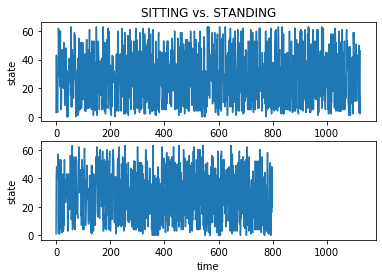

LAYING SITTING -4469.112894902366 False


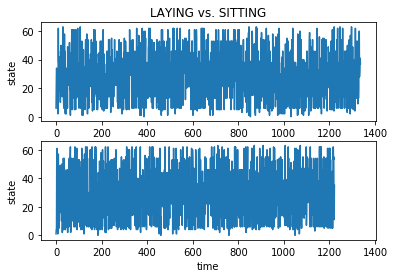

LAYING STANDING -4108.779907190685 False


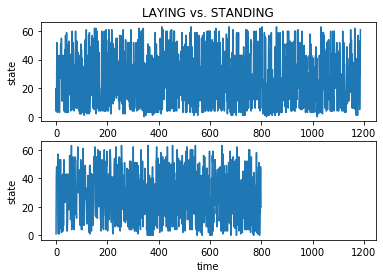

LAYING SITTING -3575.8370465021662 False


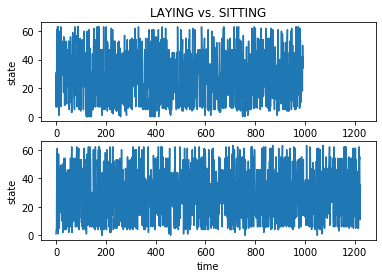

LAYING STANDING -3641.506983877415 False


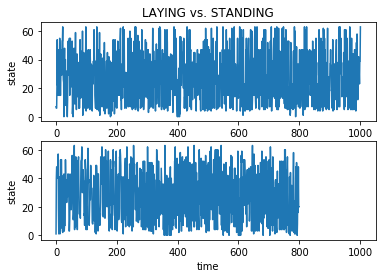

STAND_TO_SIT WALKING_UPSTAIRS -504.22042027092 False


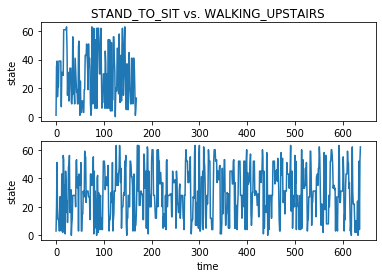

STAND_TO_SIT STANDING -551.5086439372509 False


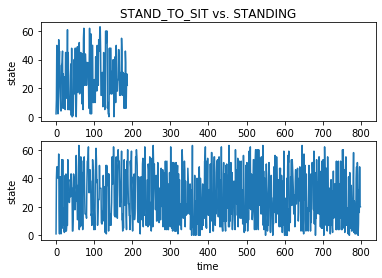

STAND_TO_SIT WALKING_UPSTAIRS -603.4181086840005 False


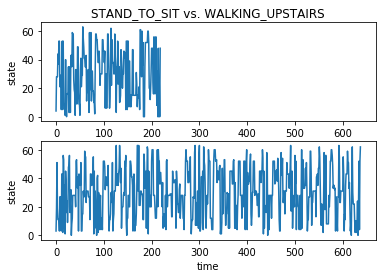

STAND_TO_SIT WALKING_DOWNSTAIRS -638.6406493200727 False


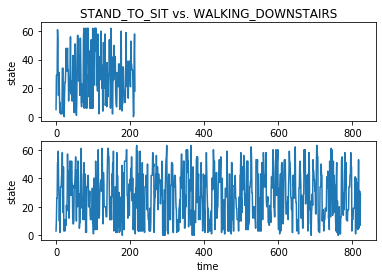

SIT_TO_STAND STANDING -405.4897097281381 False


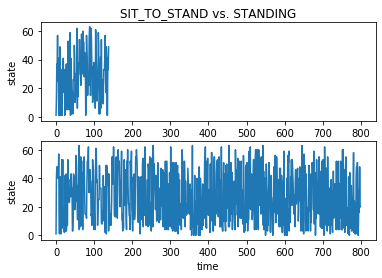

SIT_TO_STAND STAND_TO_LIE -294.4125008610763 False


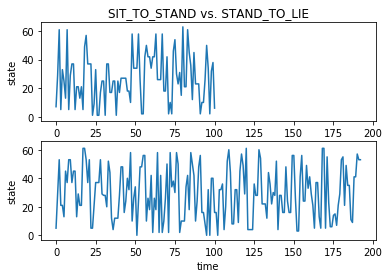

SIT_TO_STAND STAND_TO_LIE -293.32522214355316 False


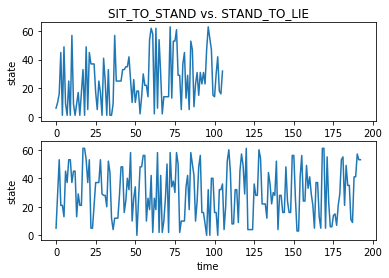

SIT_TO_STAND WALKING_DOWNSTAIRS -362.7799989622775 False


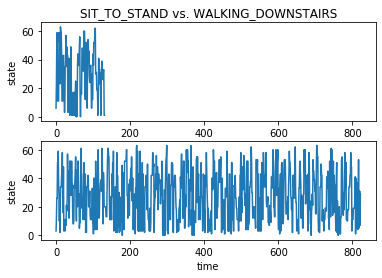

SIT_TO_LIE STAND_TO_LIE -423.466017612658 False


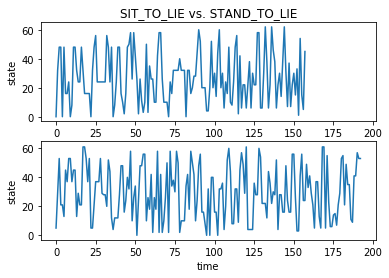

SIT_TO_LIE STANDING -942.8701049192202 False


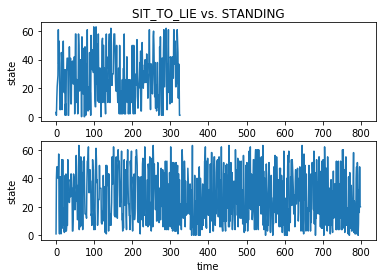

SIT_TO_LIE STANDING -645.0159141107148 False


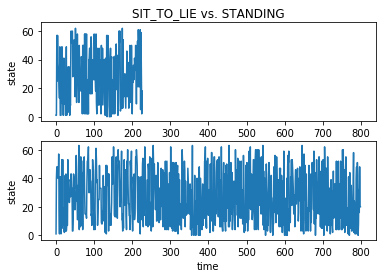

LIE_TO_SIT LIE_TO_STAND -502.94608126378927 False


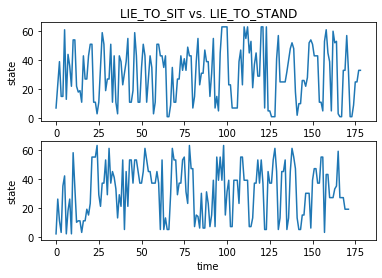

LIE_TO_SIT LIE_TO_STAND -481.7374165696203 False


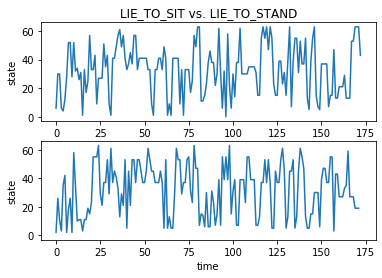

LIE_TO_SIT WALKING_UPSTAIRS -302.4997841567697 False


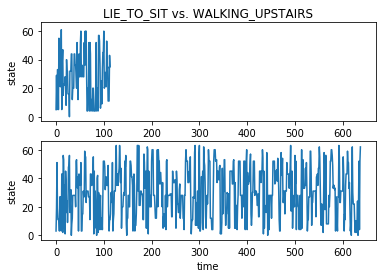

STAND_TO_LIE STANDING -772.3691507021471 False


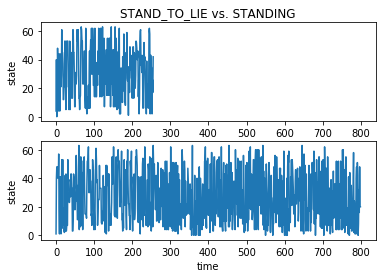

STAND_TO_LIE STANDING -911.6213152637582 False


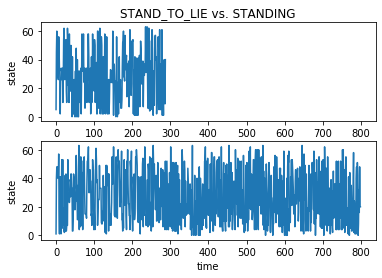

LIE_TO_STAND LIE_TO_SIT -931.9485920077345 False


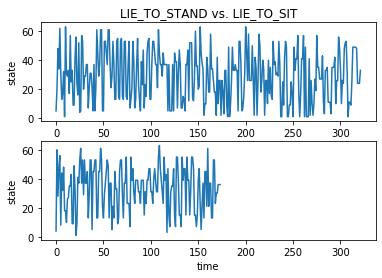

LIE_TO_STAND WALKING_UPSTAIRS -805.9020795843776 False


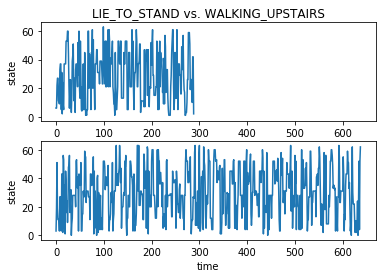

(Wrong, Total) (23, 122)
Accuracy: 81.14754098360656%


In [13]:
new_models = load_hmm_models('jerk8vel8iter50')
test_hmm_models(new_models)